# Project: Investigating a Dataset - IMDB Movie Dataset from Kaggle

# Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>



<a id='intro'></a>

# Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values  separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


# Questions to ask
The main goal of this analysis would be to explore the movie dataset and see what trends can be identified. To do this, we would ask questions like:
1. Which movie has the highest profit
2. What movie is the most popular
3. Which Actor is the most popular
4. Which studio makes the most films
5. Which genre is the most profitable?
6. Which director is the most popular?


---

In [1]:
#Importing Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
import datetime
import seaborn as sns


In [2]:
#Reading the Dataset
mov = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>

# Data Wrangling

The first step taken is to check the structure of the data.To do this, I would use general pandas methods to explore the data. 

In [3]:
#Checking the sample of the data to get a general idea of the structure
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Checking the general Information of the data to see the data-types and non-null count
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#Checking the shape of the data
mov.shape

(10866, 21)

From the .info() method called, we can see the characteristics of every column with the non-null count and the type of data. From the non-null count we see that there are some columns with missing data. This would be addressed later. This dataset 10866 rows and 21 columns. Some columns are not useful to the analysis and would be dropped.

**A summary of columns**
- id- This is a unique identifier for each movie.
- imdb_id- This is a unique identifier for each movie from the IMDB website
- popularity-  This is a measure of how popular a movie is 
- budget- The budget for the movie
- revenue- Revenue made from the movie
- original_title- The title of the movie
- cast- The actors in the movie
- homepage- The websiste for the movie
- director- The director of the movie
- tagline- The tagline of the movie 
- keywords- Words used to identofy the movie
- overview- The description of the movid
- runtime- Total runtime in minutes
- genres- The genres that the movie belong to
- production_companies- Companies that produce the movie
- release_date- Date the movie was released
- vote_count- Number of people that voted for the movie
- vote_average- Average voting of each movie
- release_year- The year the movie was released
- budget_adj- Adjusted budget to 2010 dollar value
- revenue_adj- Adjusted revenue to 2010 dollar value


In [6]:
#Describing the statistics of the movie
mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the dataset description, some problems can identify. 
- Problem 1: The IMBD id column is not included because it contains letters.
- Problem 2: From the popularity column, 75% of the dataset have popularity below or equals to 0.7, while the maximum number is 32. This signifies the existence of outliers
- Problem 3: More than 50% of the figures in the popularity and bidget columns as well as their adjusted counterpart have the value of 0
-Problem 4: The release year is interpreted as a figure and not a date-time type.
All these problem would be addressed in the data cleaning section. 

In [7]:
#Checking all the null value in the dataset
mov.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The most of the null values are in the homepage column. This column is going to be deleted. Some other non-needed columns would be deleted while other useful columns would be filled

In [8]:
#Checking the number of unique values in each columns
mov.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

There are 10866 rows in the dataset. There are 10865 unique id in the dataset, this implies that one row is duplicated. It would be dropped in the cleaning phase. One would expect that original_title would tally with the id but it doesn’t. This could indicate that one movie has two different identification number.

In [9]:
#Viewing the duplicated columns
mov[mov.duplicated(['original_title'])].sort_values('original_title')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000e+00
6514,98622,tt0443424,0.128484,0,0,9,NaN,http://www.shaneacker.com,Shane Acker,NaN,...,A rag doll fights a monster that has been stea...,11,Animation|Fantasy,NaN,4/21/05,49,7.3,2005,0.000000e+00,0.000000e+00
7917,13189,tt0087056,0.542315,0,0,A Christmas Carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,...,An old bitter miser who makes excuses for his ...,100,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000e+00
2489,16716,tt0216621,0.521573,0,0,A Christmas Carol,Patrick Stewart|Richard E. Grant|Joel Grey|Ian...,NaN,David Hugh Jones,NaN,...,Scrooge is a miserly old businessman in 1840's...,95,Drama|Fantasy,Turner Network Television (TNT)|Hallmark Enter...,12/5/99,23,6.1,1999,0.000000e+00,0.000000e+00
7891,377,tt0087800,1.331432,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,Teenagers in a small town are dropping like fl...,91,Horror,New Line Cinema|Smart Egg Pictures,11/15/84,625,7.1,1984,3.778276e+06,5.353504e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,39227,tt0324532,0.212966,0,0,When in Rome,Mary-Kate Olsen|Ashley Olsen|Leslie Danon|Juli...,NaN,Steve Purcell,NaN,...,Teenage sisters Charli and Lola are on the ver...,94,Action|Adventure|Comedy|Drama|Family,NaN,11/26/02,38,5.7,2002,0.000000e+00,0.000000e+00
3636,9364,tt1181614,0.414629,8000000,100915,Wuthering Heights,Kaya Scodelario|James Northcote|Amy Wren|Nicho...,http://www.artificial-eye.com/film.php?cinema=...,Andrea Arnold,Love is a force of nature.,...,A poor boy of unknown origins is rescued from ...,129,Drama|Romance,Ecosse Films|Film4 Productions,9/5/11,36,5.6,2011,7.755184e+06,9.782680e+04
8332,25095,tt0104181,0.269621,0,0,Wuthering Heights,Juliette Binoche|Ralph Fiennes|Jeremy Northam|...,NaN,Peter Kosminsky,A passion. An obsession. A love that destroyed...,...,Young orphan Heathcliff is adopted by the weal...,105,Drama|Romance,Paramount Pictures,10/16/92,30,7.0,1992,0.000000e+00,0.000000e+00
7423,1949,tt0443706,1.464555,65000000,84785914,Zodiac,Jake Gyllenhaal|Robert Downey Jr.|Mark Ruffalo...,NaN,David Fincher,There's more than one way to lose your life to...,...,The true story of the investigation of 'The Zo...,157,Crime|Drama|Mystery|Thriller,Paramount Pictures|Warner Bros.|Phoenix Pictures,3/2/07,1042,7.1,2007,6.835846e+07,8.916668e+07


Upon further inspection, while they may share attributes such as title and sometimes storyline, they have different attributes such as actors and directors

---

# Data Cleaning
In this part of the analysis process, I am going to be cleaning the data, droping unnessery columns, adjusting and removing outliers

# Dropping duplicates

In [10]:
#Dropping duplicates
mov.drop_duplicates(inplace=True) 

#Confirming changes
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

# Dropping columns that are not needed 
The following colunms would be dropped
imdb_id: since each movie has an id, there is no need for the imdb_id
budget: there is a value for adjusted budget
revenue: there is a value for adjusted revenue
homepage: missing the most data and is not necessary to the analysis
tagline: not needed for the analysis
overview: not needed for the analysis


In [11]:
#Droping columns
drop_colunms = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview']
mov = mov.drop(columns=drop_colunms)
#Confirming drop
mov.head()


,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now the columns have been dropped. I'm going to be adjusting the data format for the dates

# Adjusting the data format for the date

In [12]:
#Converting to datetime
mov['release_date'] = pd.to_datetime(mov['release_date'])

#Confirming change
mov.info()
mov.sort_values(['release_date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   keywords              9372 non-null   object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7280,15516,0.384193,The Last House on the Left,Sandra Peabody|Lucy Grantham|David Hess|Fred J...,Wes Craven,rape|gun|birthday|concert|death of a child,84,Horror|Thriller,Lobster Enterprises|Sean S. Cunningham Films|T...,1972-01-01,46,6.1,1972,4.693105e+05,0.000000e+00
7283,26119,0.338541,Chato's Land,Charles Bronson|Jack Palance|James Whitmore|Si...,Michael Winner,rape|posse|dead horse|canteen|carcass,110,Action|Adventure|Western,Scimitar Films,1972-01-01,15,6.6,1972,0.000000e+00,0.000000e+00
7287,15573,0.265891,The Cowboys,John Wayne|Roscoe Lee Browne|Bruce Dern|Collee...,Mark Rydell,boy|beef|cattle drive|rancher|cattle,131,Action|Adventure|Drama|Western,Warner Bros.,1972-01-13,30,6.6,1972,0.000000e+00,3.910921e+07
7272,10784,0.669045,Cabaret,Liza Minnelli|Michael York|Helmut Griem|Joel G...,Bob Fosse,berlin|sex|entertainer|cabaret|gramophone,124,Drama|Music|Romance,ABC Pictures|Bavaria Film|Allied Artists Pictures,1972-02-13,76,6.9,1972,3.128737e+07,0.000000e+00
7304,40022,0.152463,Milano Calibro 9,Gastone Moschin|Barbara Bouchet|Mario Adorf|Fr...,Fernando Di Leo,organized crime,100,Crime|Action,NaN,1972-02-15,11,6.6,1972,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,32082,0.000188,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,hospital|malpratice,103,Mystery|Comedy|Drama,Simcha Productions,2071-12-14,10,6.4,1971,0.000000e+00,0.000000e+00
9923,185,3.072555,A Clockwork Orange,Malcolm McDowell|Patrick Magee|Adrienne Corri|...,Stanley Kubrick,prison|street gang|rape|adolescence|sexuality,136,Science Fiction|Drama,Hawk Films|Warner Bros.,2071-12-18,1786,7.7,1971,1.184743e+07,1.431869e+08
9933,343,0.625188,Harold and Maude,Ruth Gordon|Bud Cort|Cyril Cusack|Charles Tyne...,Hal Ashby,suicide|life and death|depression|age differen...,91,Comedy|Drama|Romance,Paramount Pictures,2071-12-20,112,7.4,1971,6.462234e+06,0.000000e+00
9927,984,0.885391,Dirty Harry,Clint Eastwood|Harry Guardino|Reni Santoni|Joh...,Don Siegel,ambush|san francisco|detective|ransom|stadium,102,Action|Crime|Thriller,Warner Bros.|Malpaso Company,2071-12-22,300,7.2,1971,2.154078e+07,1.937378e+08


Unfortunately, in the converted date, 2071 is gotten as a year when data from the .describe() method used earlier showed the maximum year as 2015. This is due to the date formatted as YY instead of YYYY. I need to write a function to change that would subtract all the years above 2015 by 100 to get the correct year

In [13]:
#Confirming the dates above 2016
mov[mov['release_date'] > '2016-01-01'].head(10)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,62,3.309196,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,moon|jupiter|artificial intelligence|man vs ma...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
9720,871,1.152937,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,human evolution|gorilla|bondage|space marine|c...,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
9721,10331,1.058272,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,loss of father|siblings|midnight movie|zombies,96,Horror,Laurel Group|Off Color Films|Image Ten|Market ...,2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00
9722,26690,0.891163,The Boston Strangler,Tony Curtis|Henry Fonda|George Kennedy|Mike Ke...,Richard Fleischer,detective|double life|boston|strangle|serial m...,116,Crime|Drama|Mystery|Thriller,Twentieth Century Fox Film Corporation,2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00
9723,8069,0.867192,Barbarella,Jane Fonda|John Phillip Law|Anita Pallenberg|M...,Roger Vadim,sexual fantasy|alien planet|distant future|les...,98,Science Fiction,Dino de Laurentiis Cinematografica|Marianne Pr...,2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00
9724,916,0.786854,Bullitt,Steve McQueen|Jacqueline Bisset|Robert Vaughn|...,Peter Yates,san francisco|hotel|detective|based on novel|a...,113,Action|Crime|Drama|Thriller,Solar Productions|Warner Brothers/Seven Arts,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08
9725,14136,0.757746,The Love Bug,Dean Jones|Michele Lee|Buddy Hackett|Joe Flynn...,Robert Stevenson,car race|suicide attempt|sport|golden gate bri...,107,Comedy|Family|Fantasy,Walt Disney Productions,2068-12-22,62,5.8,1968,0.000000e+00,0.000000e+00
9726,18988,0.747337,The Lion in Winter,Peter O'Toole|Katharine Hepburn|Anthony Hopkin...,Anthony Harvey,england|infidelity|famous score|queen|castle,134,Drama|History,AVCO Embassy Pictures|Haworth Productions,2068-01-01,37,6.9,1968,0.000000e+00,0.000000e+00
9727,805,0.724527,Rosemary's Baby,Mia Farrow|John Cassavetes|Ruth Gordon|Sidney ...,Roman Polanski,commercial|anti-christ|contemporary setting|la...,136,Horror|Drama|Mystery,Paramount Pictures|William Castle Productions,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08
9728,12105,0.698337,Yellow Submarine,Paul Angelis|John Lennon|Paul McCartney|George...,George Dunning,submarine|fab four|colours|music|blase,90,Animation|Fantasy|Music,Apple Corps|King Features Production,2068-07-17,63,7.0,1968,0.000000e+00,0.000000e+00


There are more than 400 entries that need to be corrected

In [14]:
def fix_year(date):
    '''This function subtracts a century from date above 2016'''
    if date.year > 2016:
        year = date.year - 100
    else:
        year = date.year
    return pd.to_datetime(datetime.date(year, date.month, date.day))

mov['release_date'] = mov['release_date'].apply(fix_year)


In [15]:
#Checking the conversion
mov['release_date']
mov.info()
mov[mov['release_date'] > '2016-01-01']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   keywords              9372 non-null   object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


The date has been corrected and confirmed.

# Correcting outliers on the popularity column
More than 75% of values in the popularity columns are below 0.75. The maximum in the column is 32.9.
running the code
```mov[mov['popularity'] > 1].describe() ```
It was discovered that 1756 entries are above 1 and 75% of them are below 2. It would have been easier to drop these columns, but they contain recent and popular movies. I would write a function to normalise the data.

In [16]:
mov[mov['popularity'] > 1].describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1.756000e+03,1.756000e+03
mean,58178.353645,2.101489,110.608200,979.667995,6.387358,2003.872437,5.748676e+07,2.201003e+08
std,87624.072436,1.836949,22.872874,1115.521459,0.783752,10.850642,5.452117e+07,2.799882e+08
min,5.000000,1.000194,0.000000,10.000000,3.300000,1960.000000,0.000000e+00,0.000000e+00
25%,2162.250000,1.207331,96.000000,304.000000,5.900000,1999.000000,1.655467e+07,4.233404e+07
50%,11004.500000,1.552851,108.000000,600.500000,6.400000,2007.000000,4.000231e+07,1.307588e+08
75%,73776.500000,2.294167,122.000000,1172.000000,6.900000,2012.000000,8.374146e+07,2.894069e+08
max,417859.000000,32.985763,366.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [17]:
def normalise(pop):
    '''This function normalises extreme values in the popularity column'''
    if pop < 1:
        return pop
    elif pop < 10:
        return pop/10
    elif pop > 10:
        return pop/100

mov['popularity'] = mov['popularity'].apply(normalise)

In [18]:
#Checking the change
mov['popularity'].describe()


count    10865.000000
mean         0.339257
std          0.231501
min          0.000065
25%          0.154214
50%          0.280055
75%          0.474818
max          0.999866
Name: popularity, dtype: float64

In [19]:
#Filling all the colunms
#fill_colunms = {'cast': "Not Available",  'director': "Not Available",  'keywords': "Not Available", 'genres' :"Not Available", 'production_companies':"Not Available"}
#mov.fillna(value=fill_colunms, inplace=True)

#Checking the fill
#mov.isnull().sum()

---

<a id='eda'></a>

# Exploratory Data Analysis
We are going to explore the dataset to see general trends and patterns

In [20]:
%matplotlib inline
#Initializing Seaborn
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (15,15)})

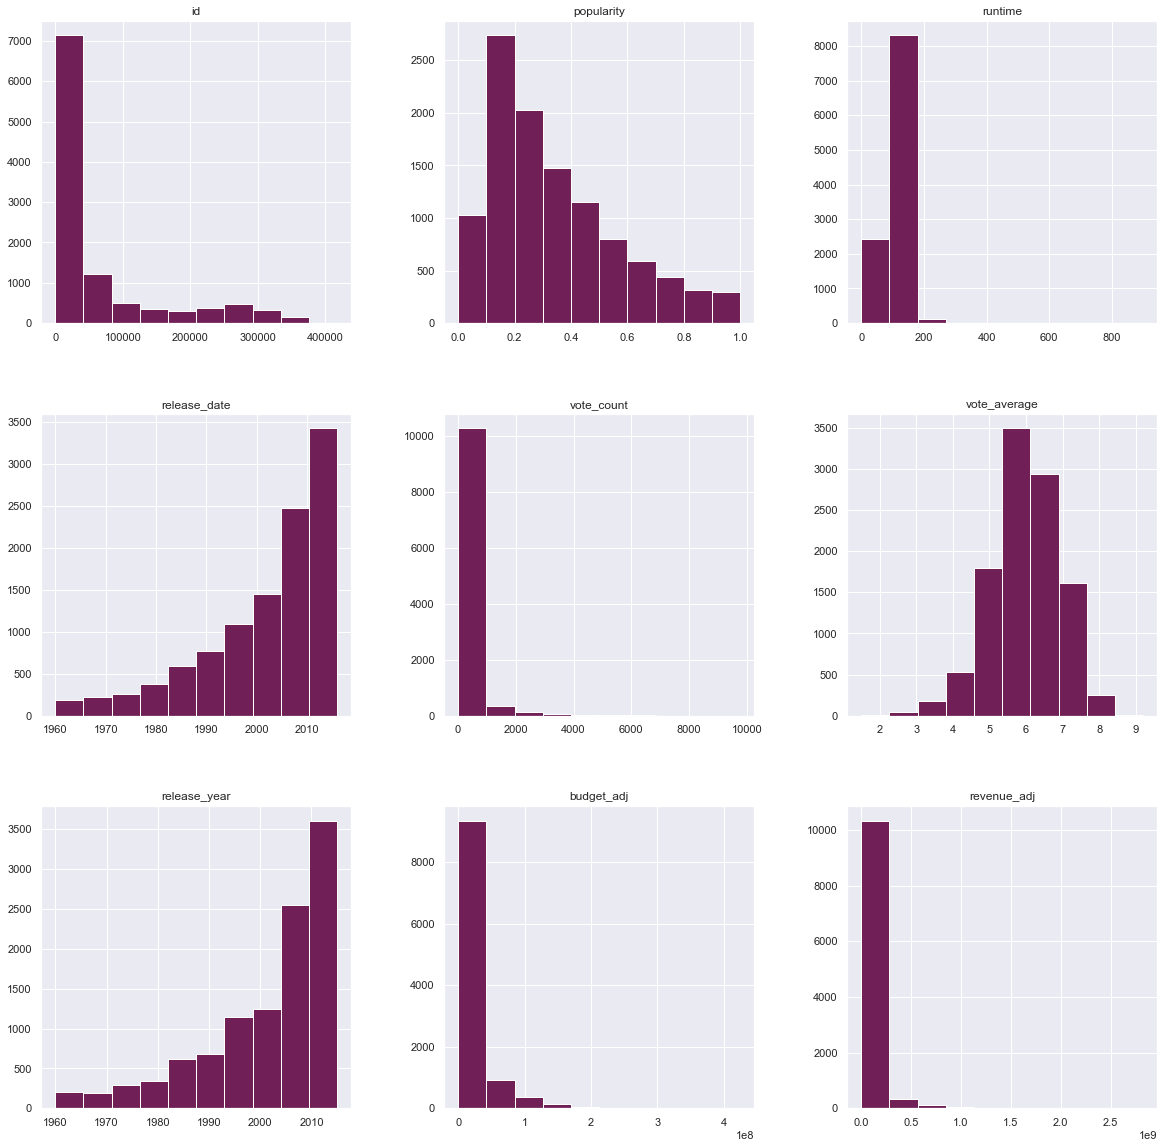

In [21]:
#Creating a general histogram to see the distribution clearly
mov.hist(figsize=[20,20], color='#701F57');

From the dataset histogram plot, we can see the general distribution of the data. A few key findings are:
- The popularity column is right skewed,
- Most movies have a run time of less than 200 minutes,
- Most movies received a less than 1000 people vote,
- The vote average is a normal distribution,
- The number of movies increases as the years do,
- Most movies have budget less than 50,000,000 dollars
- Most movies made revenue of less than 250,000,000 dollars

In [22]:
#Creating a general correlation matrix to see if any numeric figure correlates
mov.corr().style.background_gradient(cmap='rocket')

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.099782,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.099782,1.000000,0.050094,0.067307,0.025039,-0.000731,0.105045,0.055008
runtime,-0.088368,0.050094,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.067307,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.025039,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,-0.000731,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.105045,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.055008,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


The correlation matrix shows us that there's a strong positive relationship between
- Adjusted Budget and Adjusted Revenue
- Release year and Id
- Vote count and Adjusted budget
- Vote count and Adjusted revenue

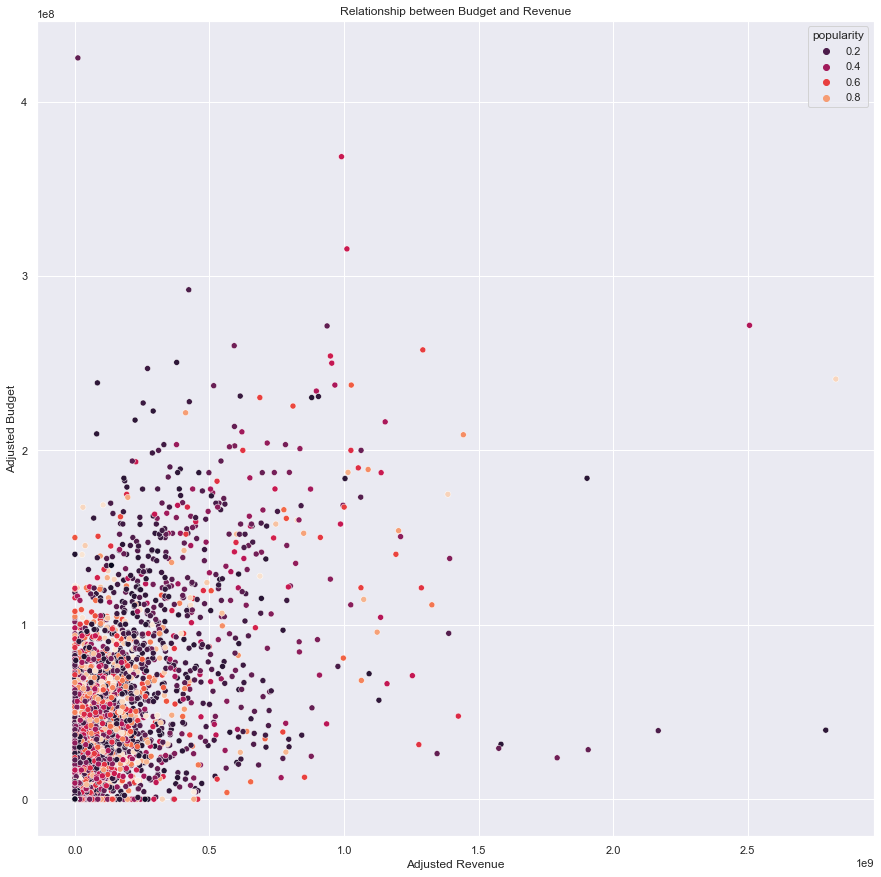

In [23]:
#Creating a scatterplot to view clearly the relationship between budget revenue and popularity
ax = sns.scatterplot(data=mov, y='budget_adj', x='revenue_adj', hue='popularity', palette='rocket')
ax.set(xlabel='Adjusted Revenue', ylabel='Adjusted Budget', title='Relationship between Budget and Revenue');

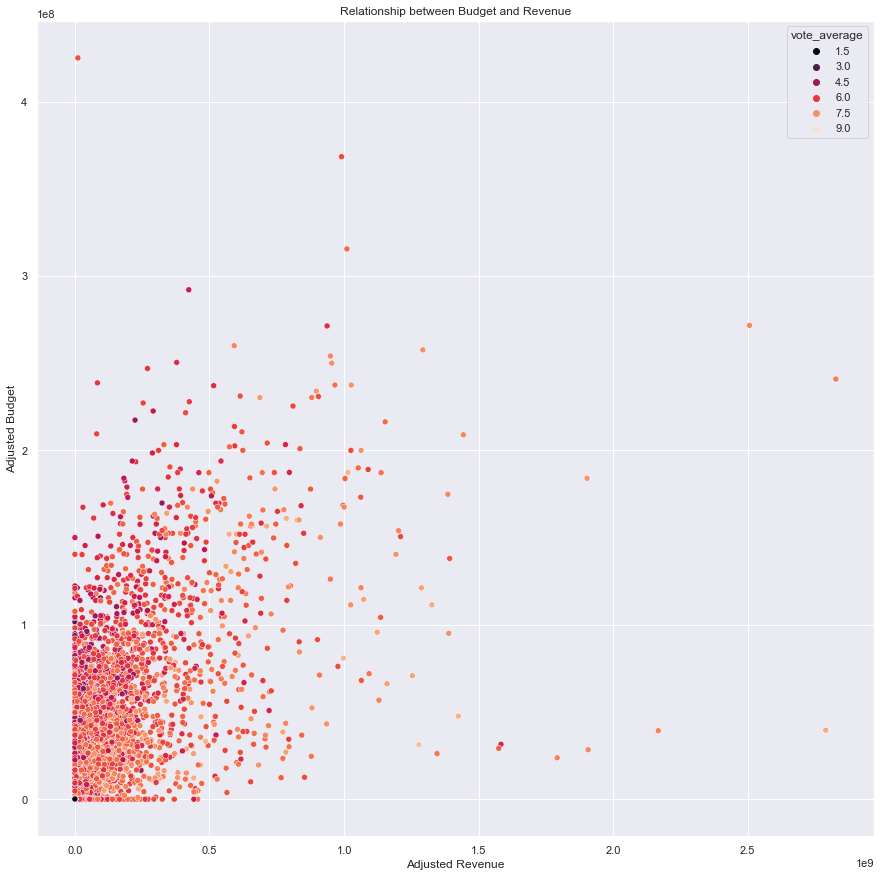

In [24]:
#Creating a scatterplot to view clearly the relationship between budget revenue and average votes
ax = sns.scatterplot(data=mov, y='budget_adj', x='revenue_adj', hue='vote_average', palette='rocket')
ax.set(xlabel='Adjusted Revenue', ylabel='Adjusted Budget', title='Relationship between Budget and Revenue');

There is a positive correlation between Revenue and Budget. This means that when the budget increases, revenue also increases. Higher voter averages are seen in movies that have larger budgets and revenue

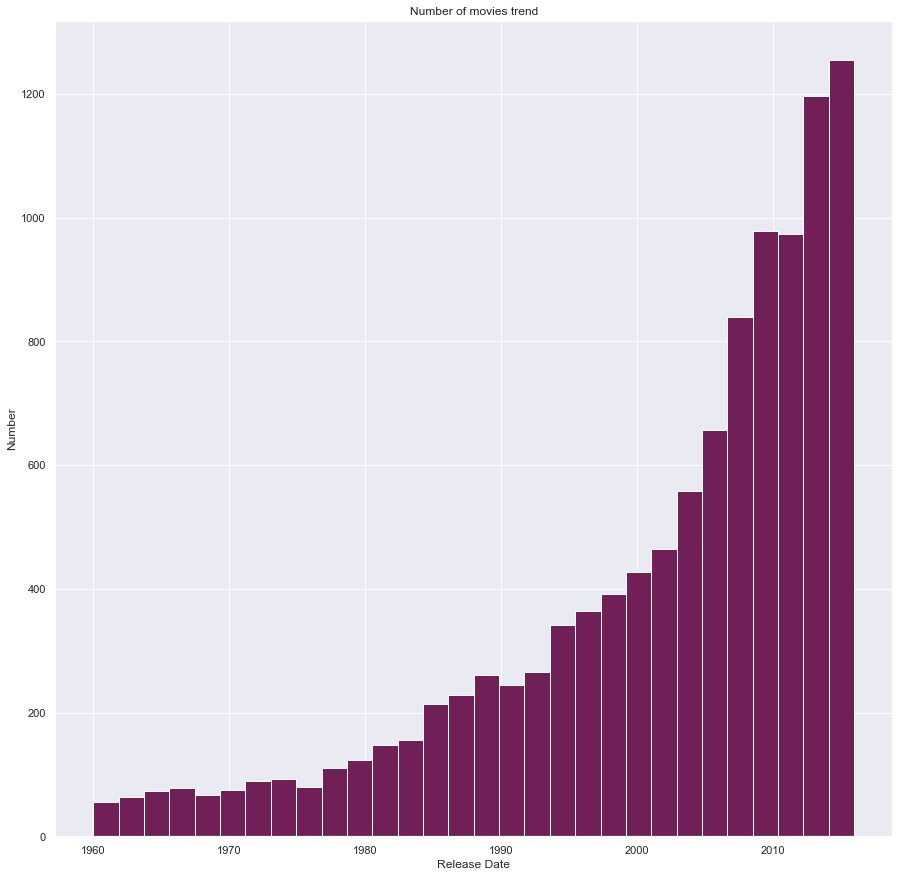

In [25]:
#Creating a histogram to see the distribution on movies by their released date
ax = sns.histplot(mov['release_date'], color='#701F57', bins=30, alpha=1)
ax.set(xlabel='Release Date', ylabel='Number', title='Number of movies trend');

Now to answer some important questions
# 1: Relationships with Directors
This section tries to answer questions such as which director has the most movies.

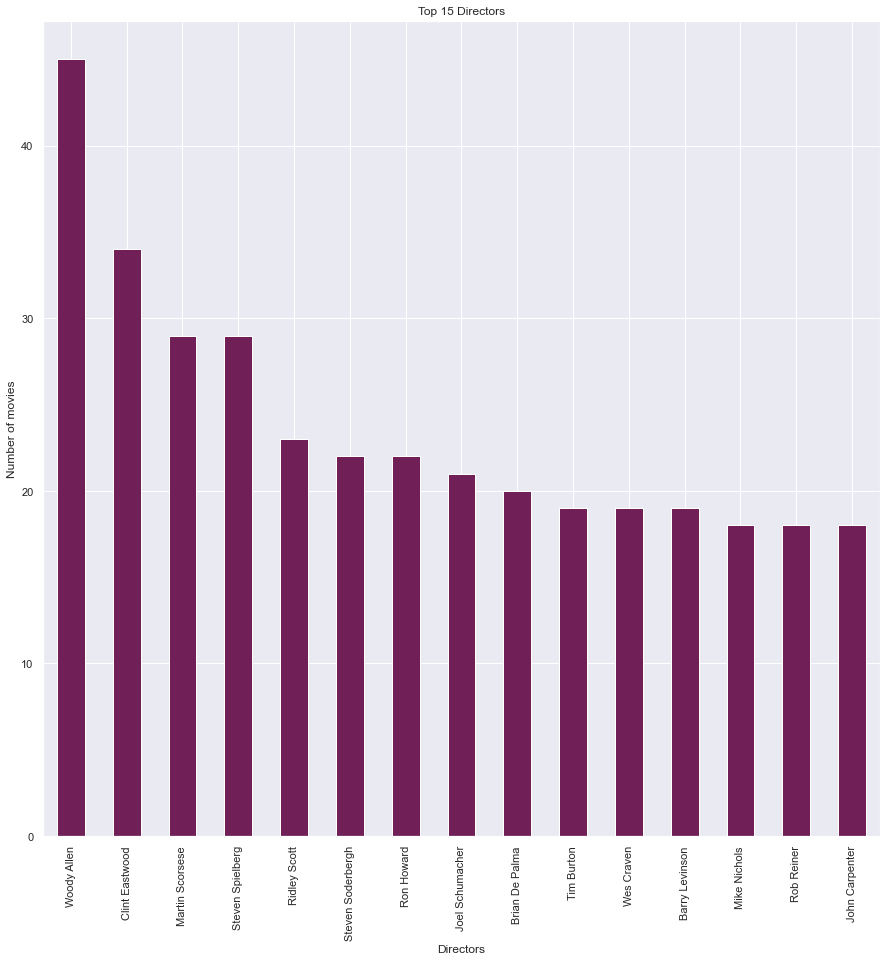

In [26]:
#Getting the top 15 directors
Top_15_dir = mov['director'].value_counts()[:15]
Top_15_dir


#Plotting the top 15 directors
plt=reload(plt)
Top_15_dir.plot(kind='bar',color='#701F57');

#Labelling the Data
plt.ylabel('Number of movies')
plt.title('Top 15 Directors')
plt.xlabel('Directors');

The director with the most movies is Woody Allen with 45 movies directed followed by Clint Eastwood and Martin Scorsese

# 2: Relationships with Genres
This section tries to answer questions such as which genre is the most popular.
To answer genre specific questions, we'd have to split and explode the genre column as movies fall into multiple genres.


In [27]:
#Copying the data to create a new dataset that would be exploded
mov_genre = mov.copy()

#Splitting by the string '|'
mov_genre['genres'] = mov_genre['genres'].str.split('|')

#Confirming the split
mov_genre.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,0.284199,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [28]:
#Exploding the dataset by the genres column
mov_genre = mov_genre.explode('genres').reset_index(drop=True)

#Confirming the data
mov_genre.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


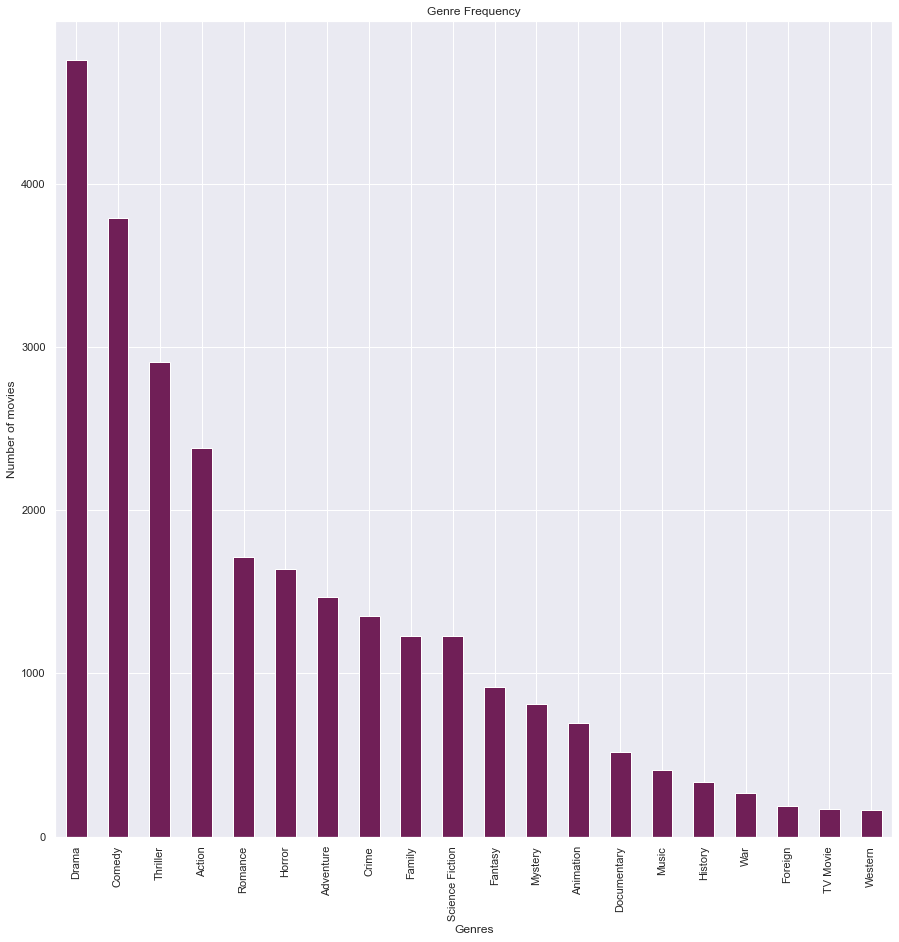

In [29]:
#Plotting the genres frequency graph
genre_grp = mov_genre['genres'].value_counts()
genre_grp.plot(kind='bar', color='#701F57')

#Labelling the Data
plt.ylabel('Number of movies')
plt.title('Genre Frequency')
plt.xlabel('Genres');

Most movies belong to the Drama genre followed by Comedy, Thriller and Action.

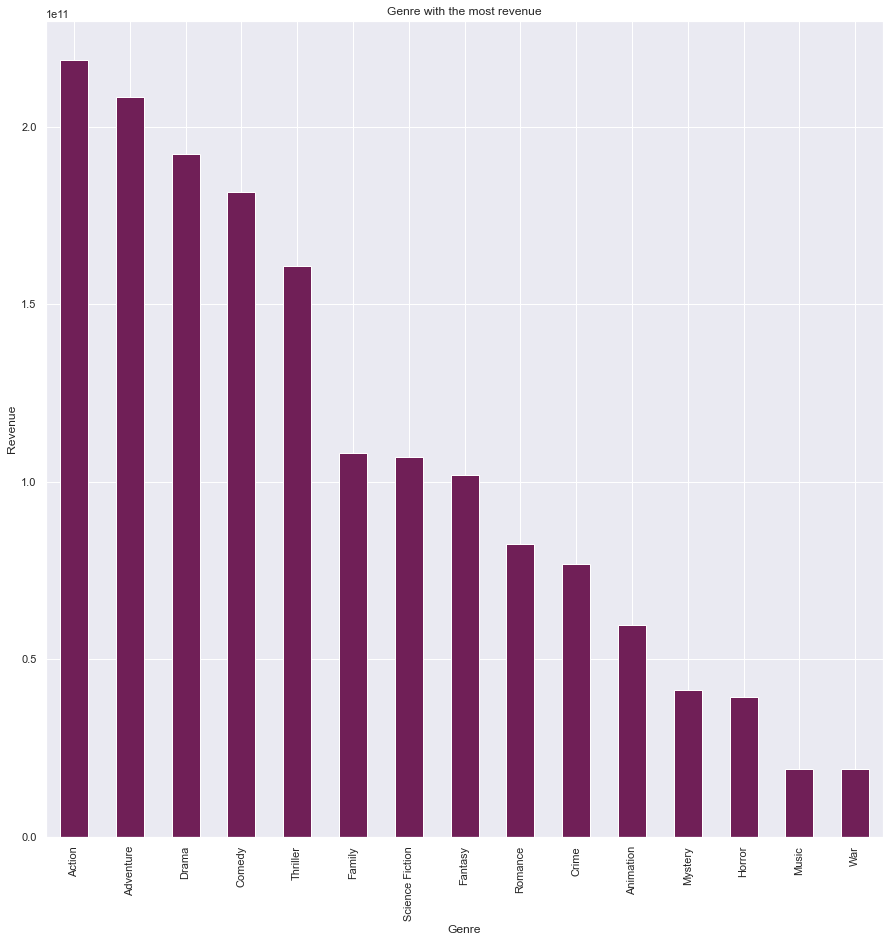

In [30]:
#Finding the genres that have the most revenue
gnre_revnu = mov_genre.groupby(['genres'])['revenue_adj'].sum().sort_values(ascending=False)[:15]

#Plotting the genre with the most revenue 
gnre_revnu.plot(kind='bar', color='#701F57');
#Labelling the data
plt.ylabel('Revenue')
plt.title('Genre with the most revenue')
plt.xlabel('Genre');

Action genre has the most revenue followed by Adventure, Drama and Comedy

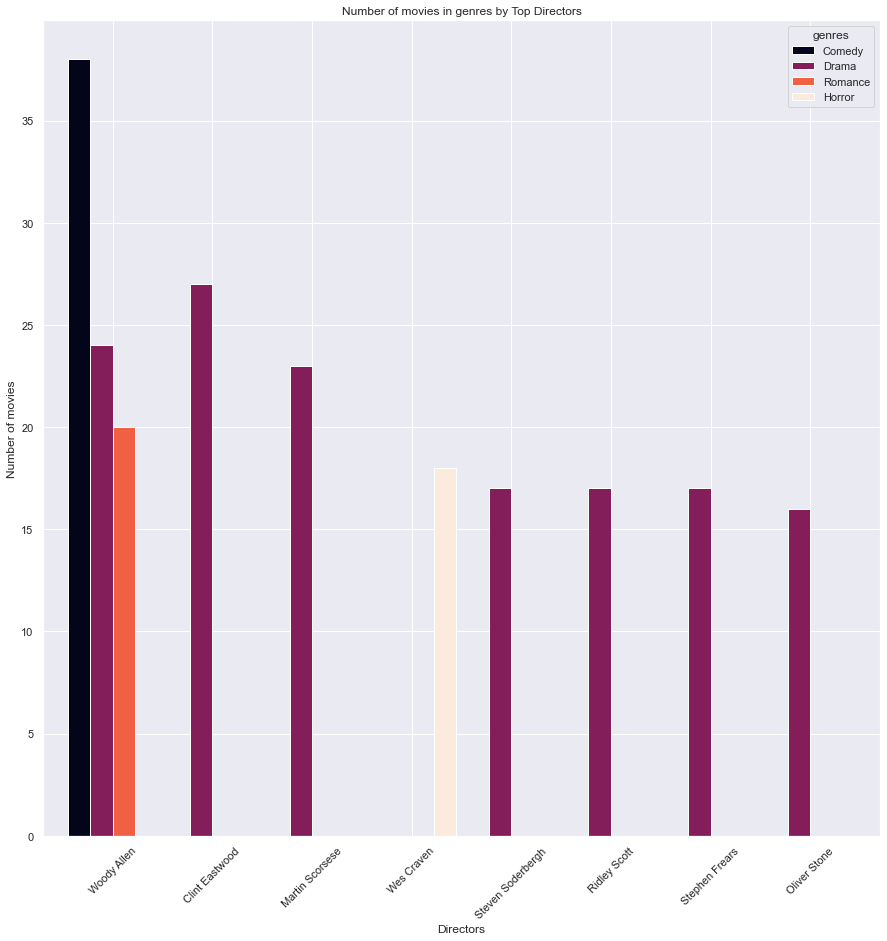

In [31]:
#Grouping the data by directors and genres
dir_gnr = mov_genre.groupby(['director','genres'])['original_title'].count().sort_values(ascending=False)[:10].unstack()
dir_gnr.plot(kind='bar', cmap = 'rocket', width = 0.9,)

#Labeling the data
plt.xticks(rotation=45);
plt.ylabel('Number of movies')
plt.title('Number of movies in genres by Top Directors')
plt.xlabel('Directors');


In [32]:
dir_gnr

genres,Comedy,Drama,Romance,Horror
director,,,,
Woody Allen,38.0,24.0,20.0,NaN
Clint Eastwood,NaN,27.0,NaN,NaN
Martin Scorsese,NaN,23.0,NaN,NaN
Wes Craven,NaN,NaN,NaN,18.0
Steven Soderbergh,NaN,17.0,NaN,NaN
Ridley Scott,NaN,17.0,NaN,NaN
Stephen Frears,NaN,17.0,NaN,NaN
Oliver Stone,NaN,16.0,NaN,NaN


From the table and graph above, the director with the most movies is Woody Allen with most movies in the comedy, drama and romance genres. Other directors dominated the drama genre with Wes Craven dominating the horror genre. 
Further exploration by genres and director

## Top 10 Action Director

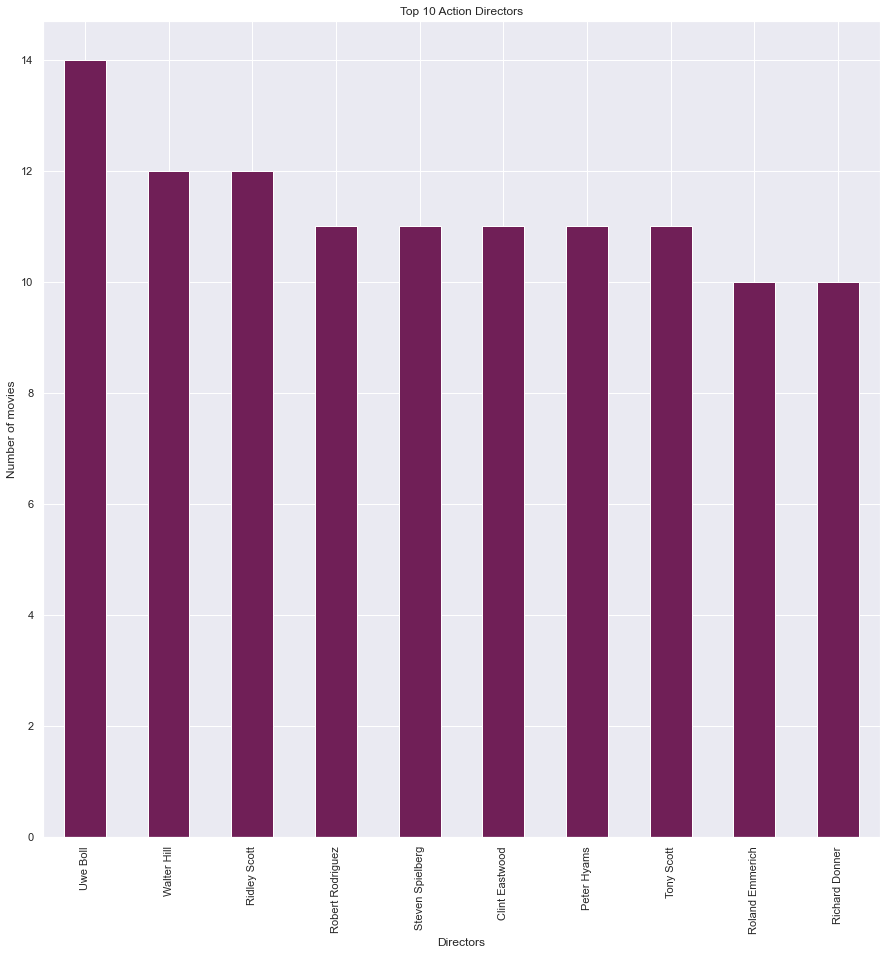

In [33]:
Top_10_act_dir = mov_genre[mov_genre['genres']=='Action'].groupby('director')['original_title'].count().sort_values(ascending=False)[:10]
Top_10_act_dir.plot(kind='bar', color='#701F57')
plt.ylabel('Number of movies')
plt.title('Top 10 Action Directors')
plt.xlabel('Directors');

## Top 10 Drama Directors

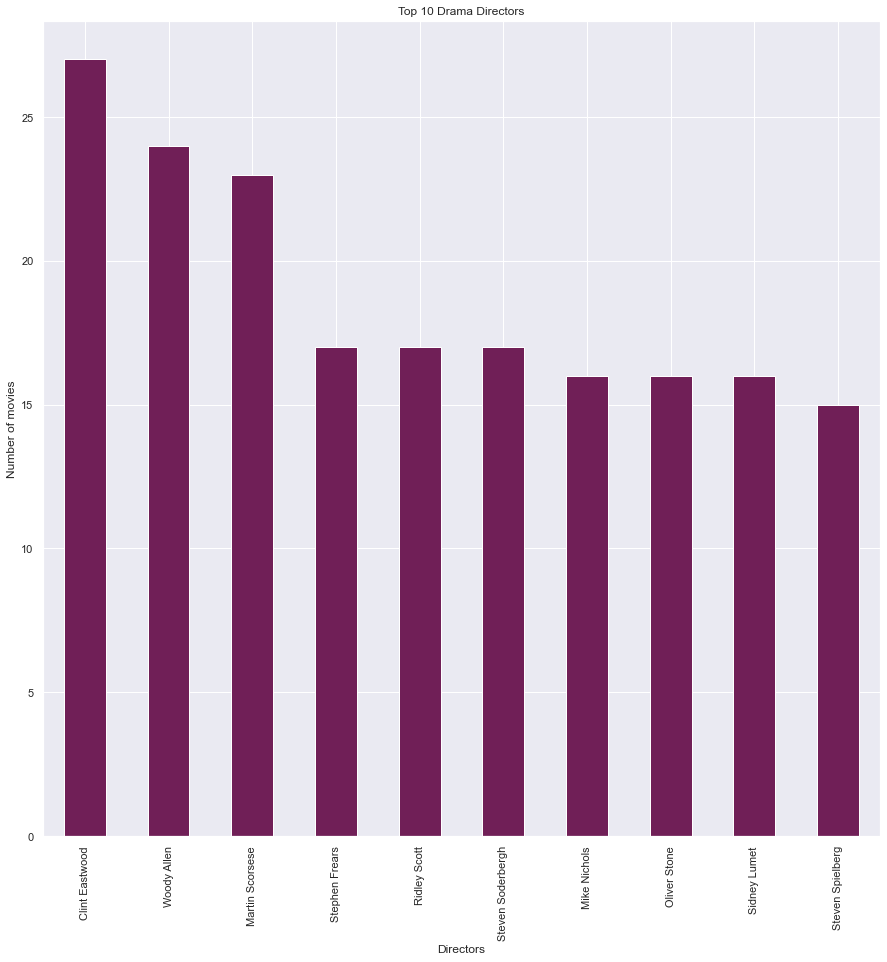

In [34]:
Top_10_dra_dir = mov_genre[mov_genre['genres']=='Drama'].groupby('director')['original_title'].count().sort_values(ascending=False)[:10]
Top_10_dra_dir.plot(kind='bar', color='#701F57')
plt.ylabel('Number of movies')
plt.title('Top 10 Drama Directors')
plt.xlabel('Directors');

## Top 10 Comedy Directors

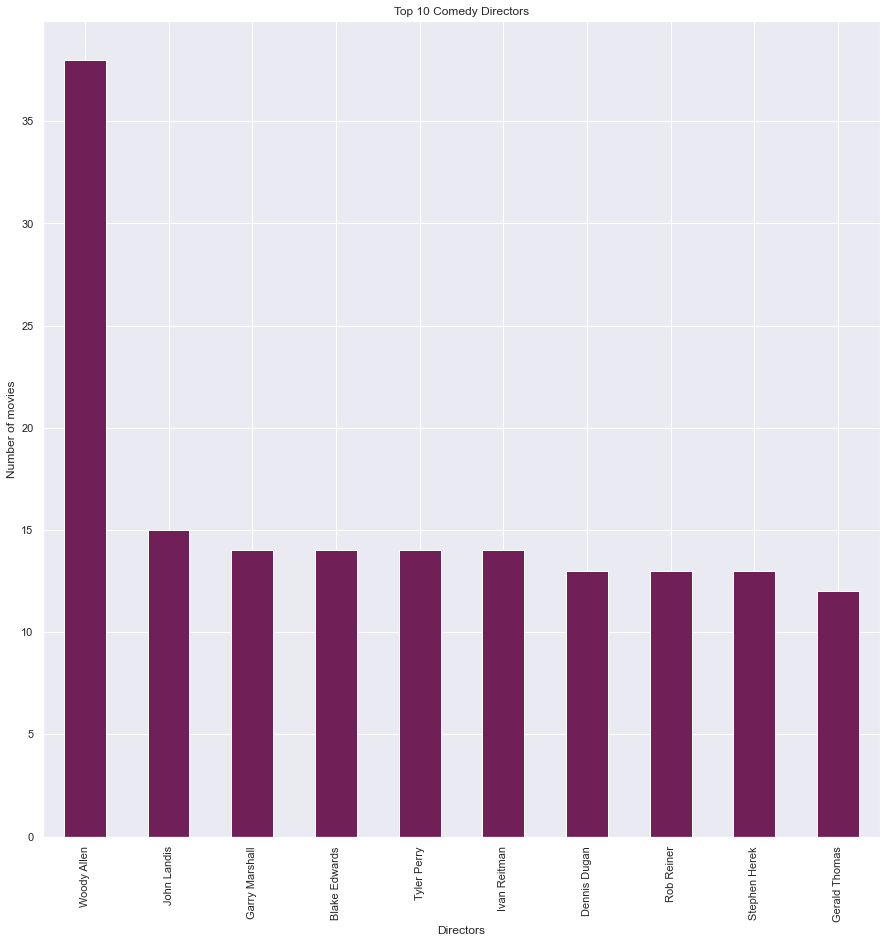

In [35]:
Top_10_cmd_dir = mov_genre[mov_genre['genres']=='Comedy'].groupby('director')['original_title'].count().sort_values(ascending=False)[:10]
Top_10_cmd_dir.plot(kind='bar', color='#701F57')
plt.ylabel('Number of movies')
plt.title('Top 10 Comedy Directors')
plt.xlabel('Directors');

## Top 10 Thriller Directors

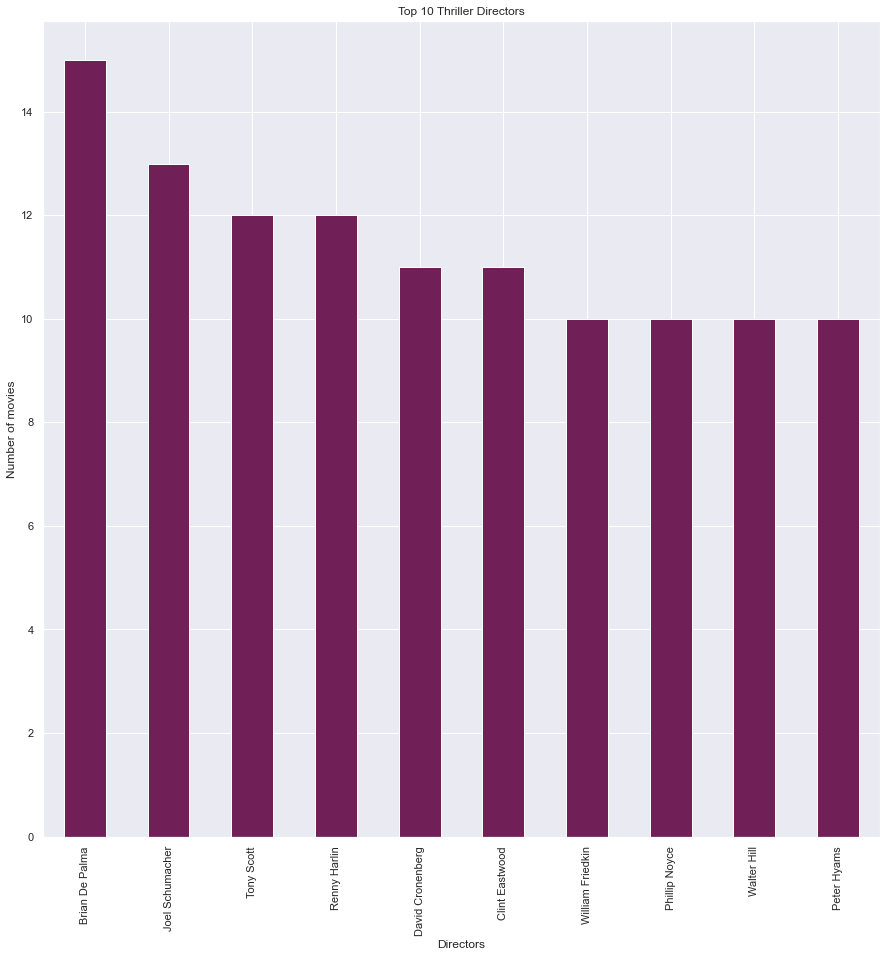

In [36]:
Top_10_Trl_dir = mov_genre[mov_genre['genres']=='Thriller'].groupby('director')['original_title'].count().sort_values(ascending=False)[:10]
Top_10_Trl_dir.plot(kind='bar', color='#701F57')
plt.ylabel('Number of movies')
plt.title('Top 10 Thriller Directors')
plt.xlabel('Directors');

# 3: Relationships with Actors
This question aims to see the most casted actor, the actors and their respective genres.  

In [37]:
#Copying the data to create a new dataset that would be exploded
mov_genre_cast = mov_genre.copy()

#Splitting by the string '|'
mov_genre_cast['cast'] = mov_genre_cast['cast'].str.split('|')

mov_genre_cast.head(2)


,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,0.329858,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [38]:
#Exploding the dataset by the cast column
mov_genre_cast = mov_genre_cast.explode('cast').reset_index(drop=True)

#Confirming the data
mov_genre_cast.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,0.329858,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


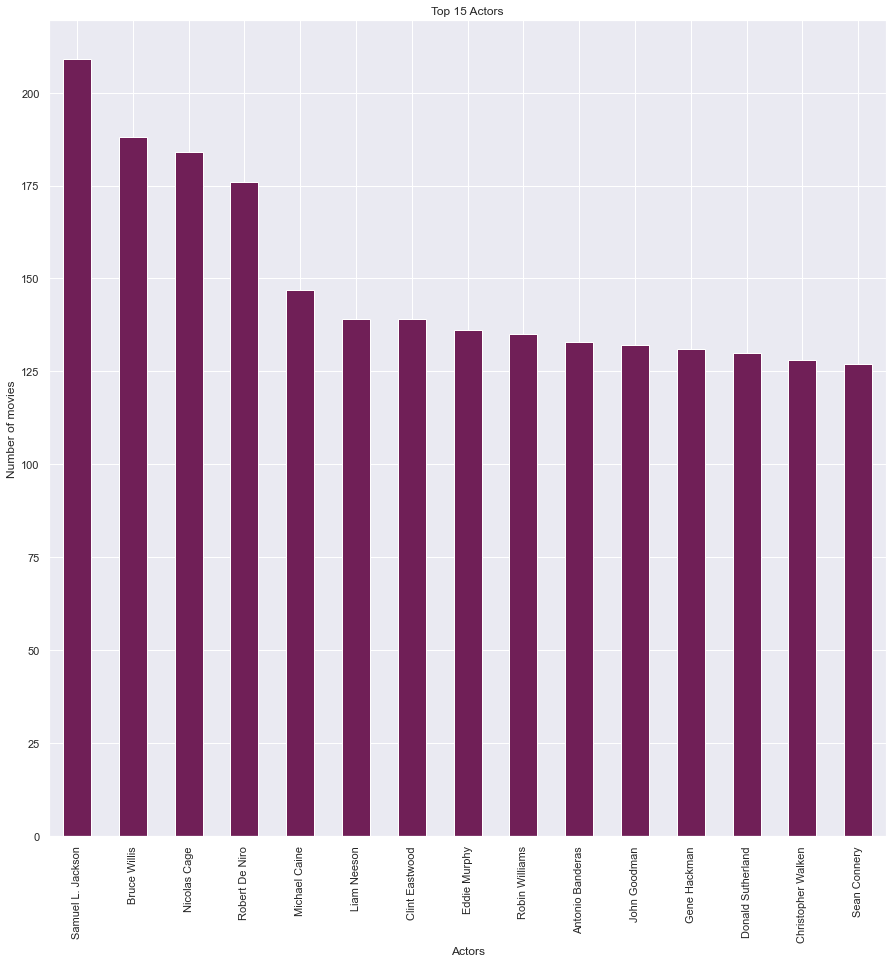

In [39]:
#Getting the top 15 Actors
Top_15_act = mov_genre_cast['cast'].value_counts()[:15]

#Plotting the top 15 Actors
Top_15_act.plot(kind='bar', color='#701F57')

#Labelling the data
plt.ylabel('Number of movies')
plt.title('Top 15 Actors')
plt.xlabel('Actors');

The actor with the most movies is Samuel L Jackson followed by Bruce Willis, Nicholas Cage, Robert De Niro, and Michael Caine

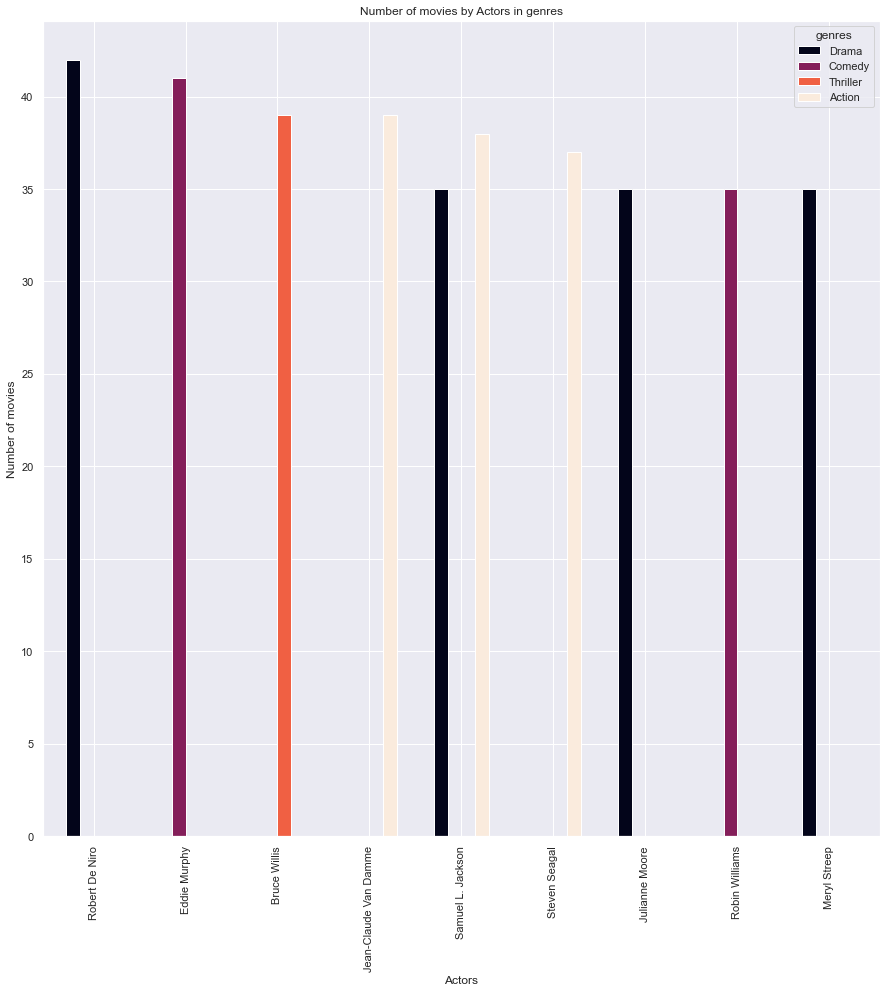

In [40]:
#Grouping the data by actors and genres
act_gnr = mov_genre_cast.groupby(['cast','genres'])['original_title'].count().sort_values(ascending=False)[:10].unstack()
act_gnr.plot(kind='bar', cmap = 'rocket', width = 0.6,)

#Labeling the data
plt.xticks(rotation=90);
plt.ylabel('Number of movies')
plt.title('Number of movies by Actors in genres')
plt.xlabel('Actors');


The grouping of the actors and genres shows the most popular genres to be Drama, Comedy, Thriller and Action.

In [41]:
act_gnr

genres,Drama,Comedy,Thriller,Action
cast,,,,
Robert De Niro,42.0,NaN,NaN,NaN
Eddie Murphy,NaN,41.0,NaN,NaN
Bruce Willis,NaN,NaN,39.0,NaN
Jean-Claude Van Damme,NaN,NaN,NaN,39.0
Samuel L. Jackson,35.0,NaN,NaN,38.0
Steven Seagal,NaN,NaN,NaN,37.0
Julianne Moore,35.0,NaN,NaN,NaN
Robin Williams,NaN,35.0,NaN,NaN
Meryl Streep,35.0,NaN,NaN,NaN


I have a theory that actors with the most films star in films across genres. I would test it by looking at the genre stats for the top five actors

In [42]:
#Samuel L Jackson's stats
mov_genre_cast[mov_genre_cast['cast'].isin(['Samuel L. Jackson'])].groupby('genres')['original_title'].count().sort_values(ascending=False)

#Bruce Willis's stats
mov_genre_cast[mov_genre_cast['cast'].isin(['Bruce Willis'])].groupby('genres')['original_title'].count().sort_values(ascending=False)

#Nicholas Cage's stats
mov_genre_cast[mov_genre_cast['cast'].isin(['Nicolas Cage'])].groupby('genres')['original_title'].count().sort_values(ascending=False)

#Robert De Niro's stats
mov_genre_cast[mov_genre_cast['cast'].isin(['Robert De Niro'])].groupby('genres')['original_title'].count().sort_values(ascending=False)

#Michael Caine's stats
mov_genre_cast[mov_genre_cast['cast'].isin(['Michael Caine'])].groupby('genres')['original_title'].count().sort_values(ascending=False)

genres
Drama              31
Thriller           22
Comedy             18
Action             17
Crime              14
Romance             8
Adventure           7
Mystery             5
Family              4
Fantasy             4
Science Fiction     4
War                 4
History             3
Horror              3
Animation           2
Documentary         1
Name: original_title, dtype: int64

After querying the top five actors, it is evident that the top actors act in a wide range of movie genres.

# 4: Relationships with production companies
This section would attempt to answer questions like what is the relationship between genres and companies, and which company is the most popular.

In [43]:
#Copying the data to create a new dataset that would be exploded
mov_genre_prod = mov_genre.copy()

#Splitting by the string '|'
mov_genre_prod['production_companies'] = mov_genre_prod['production_companies'].str.split('|')

mov_genre_prod.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [44]:
#Exploding the dataset by the cast column
mov_genre_prod = mov_genre_prod.explode('production_companies').reset_index(drop=True)

#Confirming the data
mov_genre_prod.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


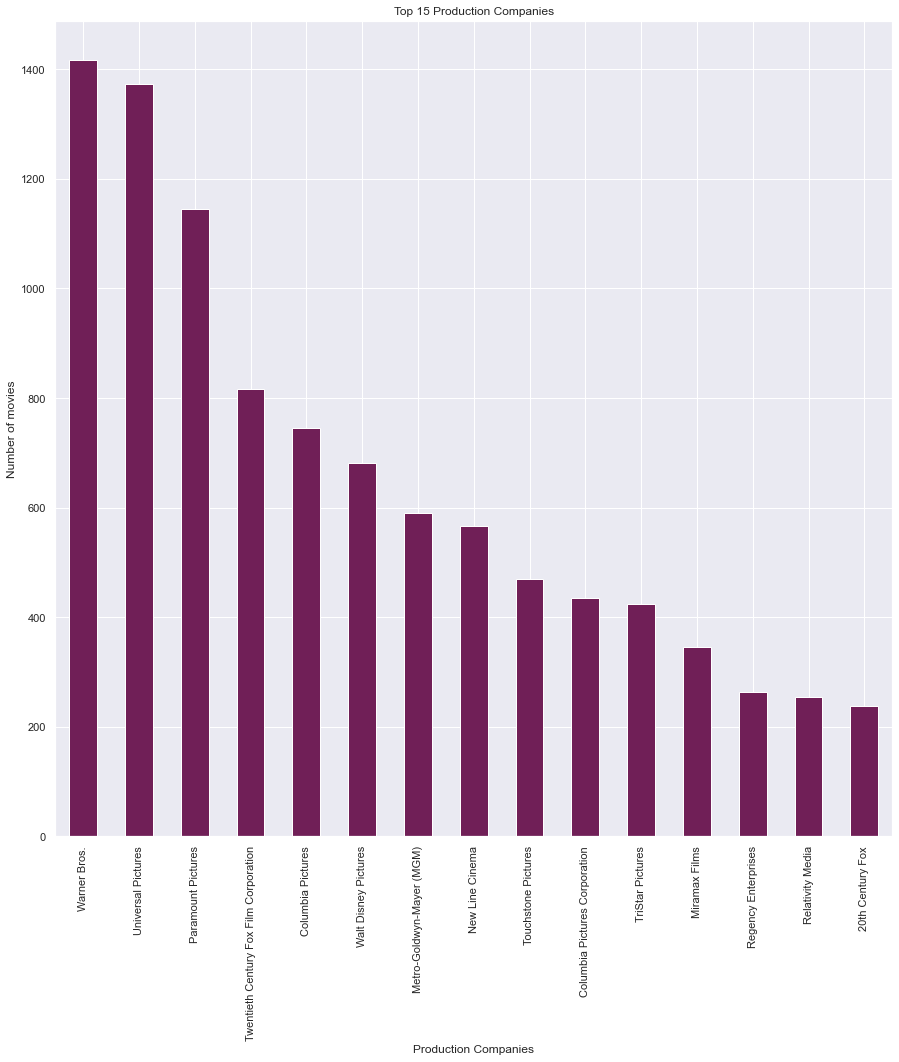

In [45]:
#Getting the top 15 production companies
Top_15_prod = mov_genre_prod['production_companies'].value_counts()[:15]

#Plotting the top 15 Production Companies
Top_15_prod.plot(kind='bar', color='#701F57')


#Labelling the data
plt.ylabel('Number of movies')
plt.title('Top 15 Production Companies')
plt.xlabel('Production Companies');

The most popular production company is Warner Bros followed by Universal Pictures, Paramount Pictures, Twentieth Century Fox and Columbia Pictures

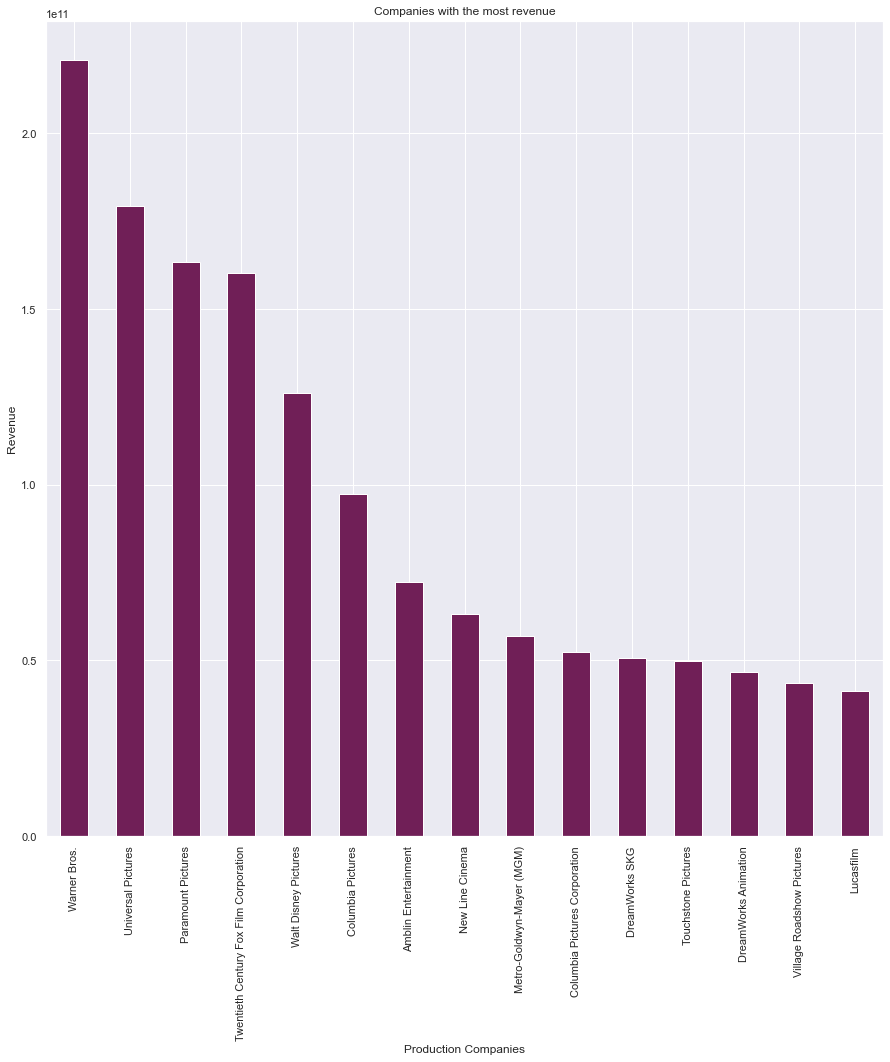

In [46]:
#Finding the companies that have the most revenue
most_revnu = mov_genre_prod.groupby(['production_companies'])['revenue_adj'].sum().sort_values(ascending=False)[:15]

#Plotting the most profitable company
most_revnu.plot(kind='bar', color='#701F57');
#Labelling the data
plt.ylabel('Revenue')
plt.title('Companies with the most revenue')
plt.xlabel('Production Companies');

Comparing the companies with the most movies with companies with the most revenues, there are exceptions in the list. Amblin Entertainment is a notable one. It brings in the 7th most revenue despite not being in the top 15 companies with the most movies. Village Roadshow Pictures and Lucasfilm also follow the trend of being in the top 15 profitable despite not being in the top 15 companies with the most movies

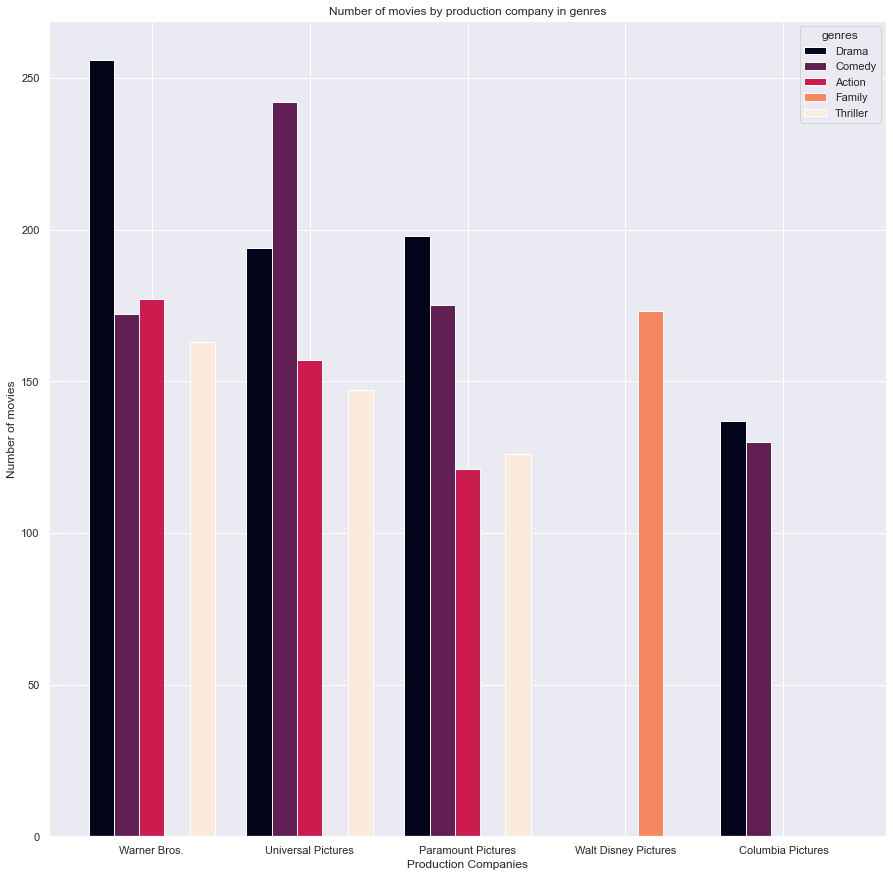

In [47]:
#Grouping by production and genre
prod_grn = mov_genre_prod.groupby(['production_companies','genres'])['original_title'].count().sort_values(ascending=False)[:15].unstack()

#Plotting the data
prod_grn.plot(kind='bar', cmap = 'rocket', width = 0.8,)

#Labeling the data
plt.xticks(rotation=0)
plt.ylabel('Number of movies')
plt.title('Number of movies by production company in genres')
plt.xlabel('Production Companies');

Most of the top companies produce a diverse range of movies except for Walt Disney Pictures which produces mainly family and animated movies

---

<a id='conclusions'></a>

# Conclusion
The movie dataset has been analyzed and questions were asked and answered. There was quite a lot of information that was gotten from the dataset. 
The major conclusions from the data are
- Most movies have a run time of fewer than 200 minutes
- Most movies received less than 1000 people’s vote
- The number of movies increases as the years do
- Most movies have a budget less than 50,000,000 dollars
- Most movies made revenue of fewer than 250,000,000 dollars
- There is a strong positive correlation between Adjusted Budget and Adjusted Revenue, Release year and Id, Vote count and Adjusted budget, and Vote count and Adjusted revenue
- The higher the budget, the higher the revenue. If production companies want to make more profit, they'd have to spend more on making the movies.
- Action genre has the most revenue followed by Adventure, Drama and Comedy. 
- Production companies with a large number of films also have high revenue except for a few exceptions
- The top actors act in movies in a very wide range of genres. If anyone is aspiring to become a top actor, they have to spread their range of movies
- Most movies are in the Drama genre and most production companies that want to profit would profit more in the drama genre. This is with the exception of Disney which is into the family and animation genre.


---

<a id='limitations'></a>

# Limitations

Unfortunately, there were some limitations while I was analyzing the data.

- Limitation 1: In the popularity column, there were quite a number of outliers as more than 90% of the dataset had values below 1 and the remainder ten percent had values ranging from 1 to 32. 
I tried to overcome this limitation by checking the IMDB website and other sources to see how the popularity was scored and how I can adjust the outliers accordingly. I couldn't find a suitable solution and the percentage of outliers are too much to drop. I decided to normalise the data by dividing by 10 if the number is in it's 10th and dividing by 100 if the number is in it's 100ths. 
Because the popularity columns were normalised by me, I couldn't carry out extensive EDA on it so as not to end up with wrong conclusions.

- Limitation 2: Due to the how the data is packed, I had to unpack the data by the respective column I was performing analysis. This was because if I had unpacked the columns simultaneously, some attributes would be duplicated and this would lead to wrong analysis whereby, the numbers analyzed would be more than what it's supposed to be.
Even with my method of unpacking one by one, there were still some forms of analysis that I was not able to carryout 

- Limitation 3: Some of the data in the budget column were missing while having counterpart in the revenue column were available and vice versa. Because of this, I was not able to calculate the profit column as planned because that would give us profits that were not accurate.
Due to this limitation, I wasn't able to compare profits.